# Convolutional Neural Network Example

Build a convolutional neural network with TensorFlow.

This example is using TensorFlow layers API, see 'convolutional_network_raw' example
for a raw TensorFlow implementation with variables.

- Author: xxx
- Project: xxx

## CNN Overview

![CNN](http://personal.ie.cuhk.edu.hk/~ccloy/project_target_code/images/fig3.png)

## MNIST Dataset Overview

This example is using MNIST handwritten digits. The dataset contains 60,000 examples for training and 10,000 examples for testing. The digits have been size-normalized and centered in a fixed-size image (28x28 pixels) with values from 0 to 1. For simplicity, each image has been flattened and converted to a 1-D numpy array of 784 features (28*28).

![MNIST Dataset](http://neuralnetworksanddeeplearning.com/images/mnist_100_digits.png)

More info: http://yann.lecun.com/exdb/mnist/

In [3]:
!pip install tensorflow matplotlib numpy pandas


     |████████████████████████████████| 109.3MB 86kB/s s eta 0:00:01█▍                        | 25.1MB 3.1MB/s eta 0:00:28        | 44.1MB 24.6MB/s eta 0:00:03.1MB 35.8MB/s eta 0:00:02[K     |████████████████████            | 68.6MB 35.8MB/s eta 0:00:02     | 71.2MB 35.8MB/s eta 0:00:02�█████████████████▋        | 80.8MB 35.8MB/s eta 0:00:01     |██████████████████████████▍     | 90.0MB 32.9MB/s eta 0:00:01
     |████████████████████████████████| 13.1MB 41.4MB/s eta 0:00:01       | 266kB 41.4MB/s eta 0:00:01�███████████▋               | 6.8MB 41.4MB/s eta 0:00:01████████████████████████████▉ | 12.6MB 41.4MB/s eta 0:00:01
     |████████████████████████████████| 17.3MB 27.6MB/s eta 0:00:01                     | 5.4MB 27.6MB/s eta 0:00:01��█▋            | 10.6MB 27.6MB/s eta 0:00:01
     |████████████████████████████████| 10.1MB 34.9MB/s eta 0:00:01B/s eta 0:00:01
     |████████████████████████████████| 102kB 26.8MB/s ta 0:00:01
     |████████████████████████████████| 491kB 37.1MB/s eta 0

In [4]:
from __future__ import division, print_function, absolute_import

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=False)

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

W0710 11:23:44.678099 140071065188160 deprecation.py:323] From <ipython-input-4-8f4b81ac1ea3>:5: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0710 11:23:44.679761 140071065188160 deprecation.py:323] From /srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0710 11:23:44.681410 140071065188160 deprecation.py:323] From /srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/base.py:252: _internal_retry.<locals>.wrap.<locals>.wrapped_fn (from tensorflow.contrib.learn.python.learn.datasets.base) is de

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz


W0710 11:23:45.373740 140071065188160 deprecation.py:323] From /srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0710 11:23:45.529055 140071065188160 deprecation.py:323] From /srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [19]:
# Training Parameters
learning_rate = 0.1
num_steps = 100
batch_size = 25

# Network Parameters
num_input = 784 # MNIST data input (img shape: 28*28)
num_classes = 10 # MNIST total classes (0-9 digits)
dropout = 0.4 # Dropout, probability to drop a unit

In [20]:
# Create the neural network
def conv_net(x_dict, n_classes, dropout, reuse, is_training):
    
    # Define a scope for reusing the variables
    with tf.variable_scope('ConvNet', reuse=reuse):
        # TF Estimator input is a dict, in case of multiple inputs
        x = x_dict['images']

        # MNIST data input is a 1-D vector of 784 features (28*28 pixels)
        # Reshape to match picture format [Height x Width x Channel]
        # Tensor input become 4-D: [Batch Size, Height, Width, Channel]
        x = tf.reshape(x, shape=[-1, 28, 28, 1])

        # Convolution Layer with 32 filters and a kernel size of 5
        conv1 = tf.layers.conv2d(x, 32, 5, activation=tf.nn.relu)
        # Max Pooling (down-sampling) with strides of 2 and kernel size of 2
        conv1 = tf.layers.max_pooling2d(conv1, 2, 2)

        # Convolution Layer with 64 filters and a kernel size of 3
        conv2 = tf.layers.conv2d(conv1, 64, 3, activation=tf.nn.relu)
        # Max Pooling (down-sampling) with strides of 2 and kernel size of 2
        conv2 = tf.layers.max_pooling2d(conv2, 2, 2)

        # Flatten the data to a 1-D vector for the fully connected layer
        fc1 = tf.contrib.layers.flatten(conv2)

        # Fully connected layer (in tf contrib folder for now)
        fc1 = tf.layers.dense(fc1, 1024)
        # Apply Dropout (if is_training is False, dropout is not applied)
        fc1 = tf.layers.dropout(fc1, rate=dropout, training=is_training)

        # Output layer, class prediction
        out = tf.layers.dense(fc1, n_classes)

    return out

In [21]:
# Define the model function (following TF Estimator Template)
def model_fn(features, labels, mode):
    
    # Build the neural network
    # Because Dropout have different behavior at training and prediction time, we
    # need to create 2 distinct computation graphs that still share the same weights.
    logits_train = conv_net(features, num_classes, dropout, reuse=False, is_training=True)
    logits_test = conv_net(features, num_classes, dropout, reuse=True, is_training=False)
    
    # Predictions
    pred_classes = tf.argmax(logits_test, axis=1)
    pred_probas = tf.nn.softmax(logits_test)
    
    # If prediction mode, early return
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode, predictions=pred_classes) 
        
    # Define loss and optimizer
    loss_op = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
        logits=logits_train, labels=tf.cast(labels, dtype=tf.int32)))
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
    train_op = optimizer.minimize(loss_op, global_step=tf.train.get_global_step())
    
    # Evaluate the accuracy of the model
    acc_op = tf.metrics.accuracy(labels=labels, predictions=pred_classes)
    
    # TF Estimators requires to return a EstimatorSpec, that specify
    # the different ops for training, evaluating, ...
    estim_specs = tf.estimator.EstimatorSpec(
      mode=mode,
      predictions=pred_classes,
      loss=loss_op,
      train_op=train_op,
      eval_metric_ops={'accuracy': acc_op})

    return estim_specs

In [22]:
# Build the Estimator
model = tf.estimator.Estimator(model_fn)

W0710 11:26:54.315005 140071065188160 estimator.py:1811] Using temporary folder as model directory: /tmp/tmpb8ppw1vb


In [23]:
# Define the input function for training
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': mnist.train.images}, y=mnist.train.labels,
    batch_size=batch_size, num_epochs=None, shuffle=True)
# Train the Model
model.train(input_fn, steps=num_steps)

In [24]:
# Evaluate the Model
# Define the input function for evaluating
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': mnist.test.images}, y=mnist.test.labels,
    batch_size=batch_size, shuffle=False)
# Use the Estimator 'evaluate' method
model.evaluate(input_fn)

{'accuracy': 0.9606, 'loss': 0.13733825, 'global_step': 500}

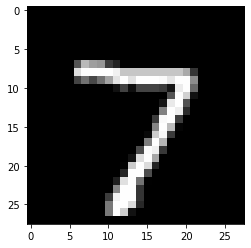

Model prediction: 7


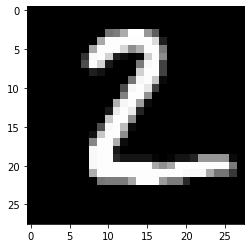

Model prediction: 2


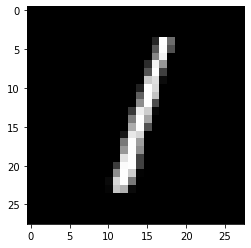

Model prediction: 1


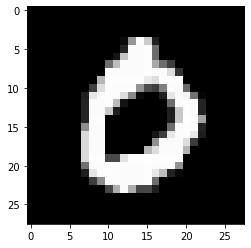

Model prediction: 0


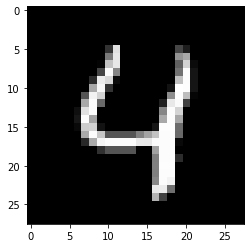

Model prediction: 4


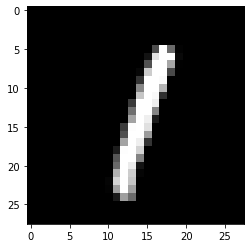

Model prediction: 1


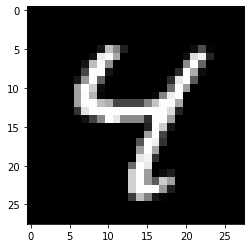

Model prediction: 4


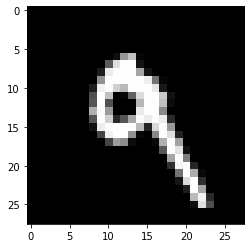

Model prediction: 9


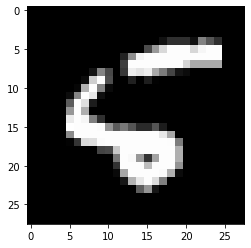

Model prediction: 5


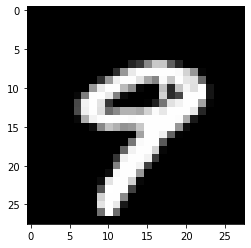

Model prediction: 9


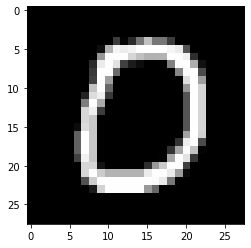

Model prediction: 0


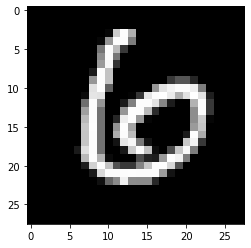

Model prediction: 6


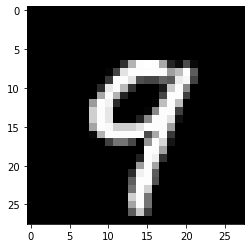

Model prediction: 9


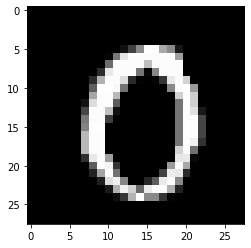

Model prediction: 0


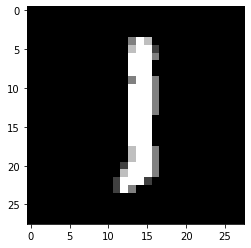

Model prediction: 1


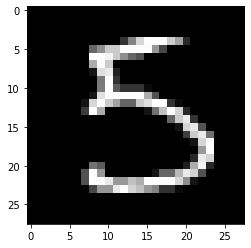

Model prediction: 5


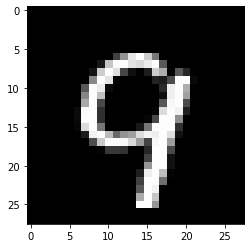

Model prediction: 9


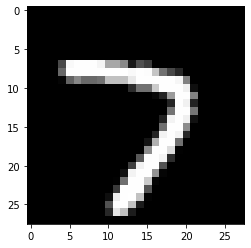

Model prediction: 7


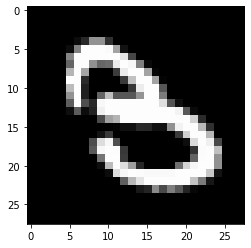

Model prediction: 2


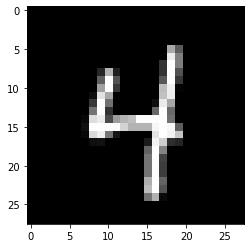

Model prediction: 4


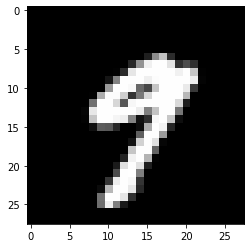

Model prediction: 9


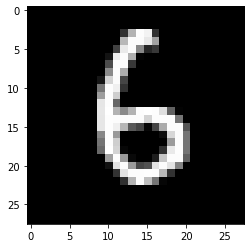

Model prediction: 6


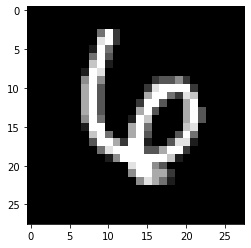

Model prediction: 6


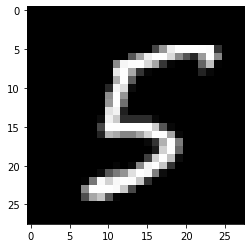

Model prediction: 5


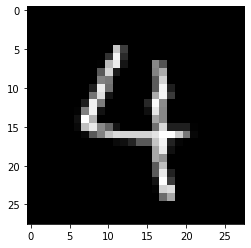

Model prediction: 4


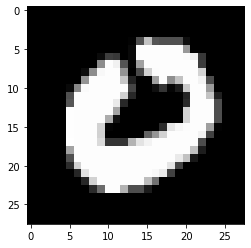

Model prediction: 0


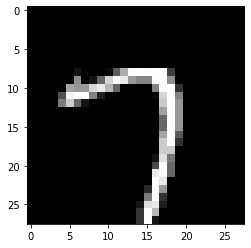

Model prediction: 7


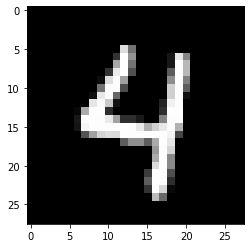

Model prediction: 4


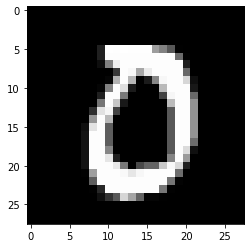

Model prediction: 0


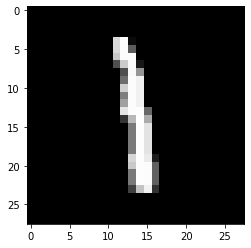

Model prediction: 1


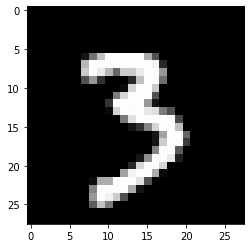

Model prediction: 3


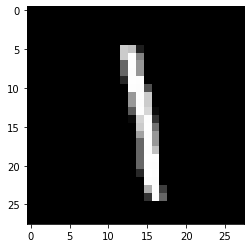

Model prediction: 1


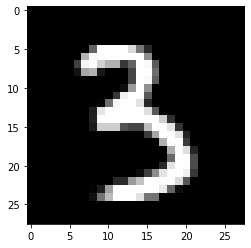

Model prediction: 3


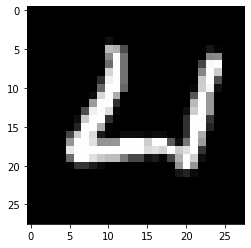

Model prediction: 4


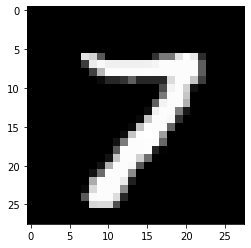

Model prediction: 7


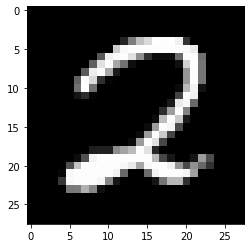

Model prediction: 2


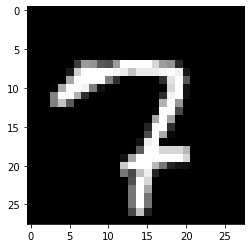

Model prediction: 7


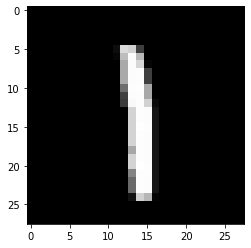

Model prediction: 1


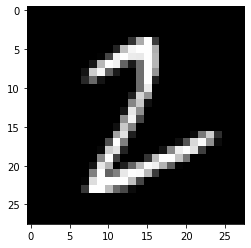

Model prediction: 2


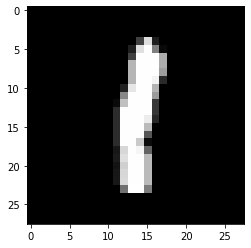

Model prediction: 1


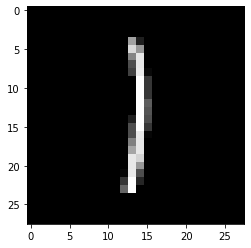

Model prediction: 1


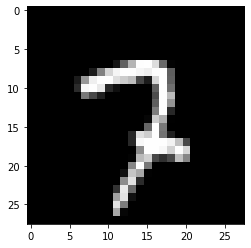

Model prediction: 7


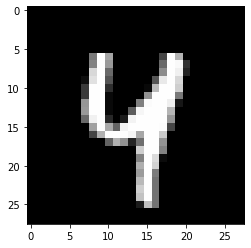

Model prediction: 4


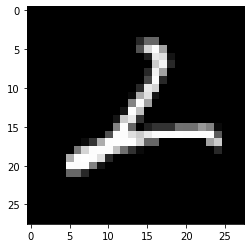

Model prediction: 2


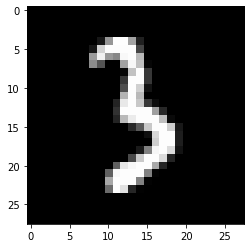

Model prediction: 3


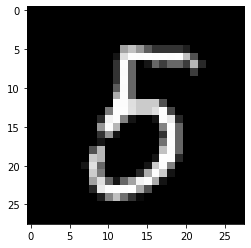

Model prediction: 5


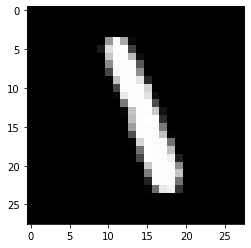

Model prediction: 1


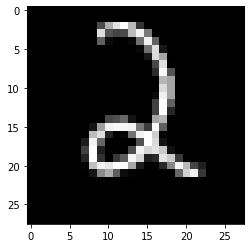

Model prediction: 2


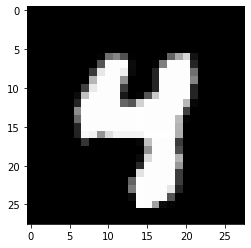

Model prediction: 4


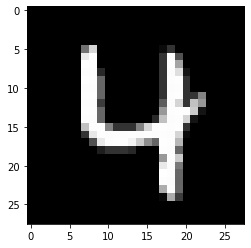

Model prediction: 4


In [25]:
# Predict single images
n_images = 50
# Get images from test set
test_images = mnist.test.images[:n_images]
# Prepare the input data
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': test_images}, shuffle=False)
# Use the model to predict the images class
preds = list(model.predict(input_fn))

# Display
for i in range(n_images):
    plt.imshow(np.reshape(test_images[i], [28, 28]), cmap='gray')
    plt.show()
    print("Model prediction:", preds[i])